TO DO:
Move cis into separate notebook and do it for all 3 cancer types. Try to get the graph combined

For the trans effects run them for all 62 phosphosites.
Figure out why we keep getting this error:
Incorrectly Formatted Dataframe! Label column must have exactly 2 unique values.

In [1]:
import cptac
import cptac.utils as u
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
en = cptac.Endometrial()

In [64]:
phos = en.get_phosphoproteomics()

In [4]:
phos.head()

Name         AAAS                  AACS  AAED1 AAGAB          AAK1         \
Site         S495    S541   Y485   S618    S12  S310   S311    S14    S18   
Patient_ID                                                                  
C3L-00006     NaN     NaN    NaN -0.881 -1.810   NaN    NaN    NaN -0.242   
C3L-00008     NaN     NaN    NaN    NaN  0.084   NaN    NaN -1.110 -0.383   
C3L-00032  -0.202     NaN    NaN    NaN -1.880   NaN    NaN    NaN  0.382   
C3L-00090  -0.002     NaN -0.407    NaN    NaN   NaN    NaN    NaN    NaN   
C3L-00098   0.556 -0.0461    NaN    NaN  0.941   NaN  0.429  0.362  0.697   

Name                ...     ZZZ3                                            \
Site           S20  ...     S397 S411 S420   S424     S426 S468   S89 T415   
Patient_ID          ...                                                      
C3L-00006  -0.2420  ...  0.18400  NaN  NaN    NaN -0.20500  NaN   NaN  NaN   
C3L-00008  -1.0900  ... -0.17100  NaN  NaN -0.393 -0.17100  NaN  0.29  NaN   
C3L-00032  -0.0416  ...      NaN  NaN  NaN    NaN      NaN  NaN   NaN  NaN   
C3L-00090  -0.5550  ...  0.13970  NaN  NaN    NaN -0.55900  NaN   NaN  NaN   
C3L-00098  -0.0529  ... -0.15875  NaN  NaN  0.196  0.06175  NaN   NaN  NaN   

Name                        
Site          T418    Y399  
Patient_ID                  
C3L-00006      NaN     NaN  
C3L-00008   0.1605 -0.0635  
C3L-00032      NaN     NaN  
C3L-00090      NaN  0.2980  
C3L-00098      NaN -0.2900  

[5 rows x 73212 columns]

# CIS Endo

In [5]:
gene = 'PIK3CA'

In [65]:
#Prioritize hotspot mutations
endo = en.get_genotype_all_vars(gene, mutation_hotspot=["H1047R", 'E542K', 'E535K'])
#pull out all the missense mutation and wildtype tumors 
missense = endo.loc[(endo['Mutation'] == "Missense_Mutation") | (endo['Mutation'] == "Wildtype_Tumor")]
#drop everything but the mutation column and join to proteomic data
missense = missense.drop(columns=['Location', 'Mutation_Status'])

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 48 samples for the PIK3CA gene (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 382)


In [66]:
mut_and_phos = missense.join(phos['PIK3CA'])
mut_and_phos.head()

,Mutation,S312,T313
Patient_ID,,,
C3L-00006,Missense_Mutation,-0.00615,0.0731
C3L-00008,Wildtype_Tumor,-0.02220,NaN
C3L-00032,Missense_Mutation,NaN,0.0830
C3L-00090,Wildtype_Tumor,NaN,-0.8460
C3L-00136,Wildtype_Tumor,0.20500,NaN


In [67]:
phos_col = list(phos['PIK3CA'].columns)

In [68]:
result = pd.DataFrame(columns=['Comparison', 'P_Value'])
dfs = []
for column in mut_and_phos:
    if column == "Mutation": pass
    else:
        site = mut_and_phos[column]
        df = mut_and_phos[['Mutation', column]].dropna()
#         df['Site'] = site
        dfs.append(u.wrap_ttest(df, 'Mutation', [column], return_all = True))
newdf = pd.concat(dfs)
#we're sorting
newdf.sort_values('P_Value')

,Comparison,P_Value
0,T313,0.149861
0,S312,0.494436


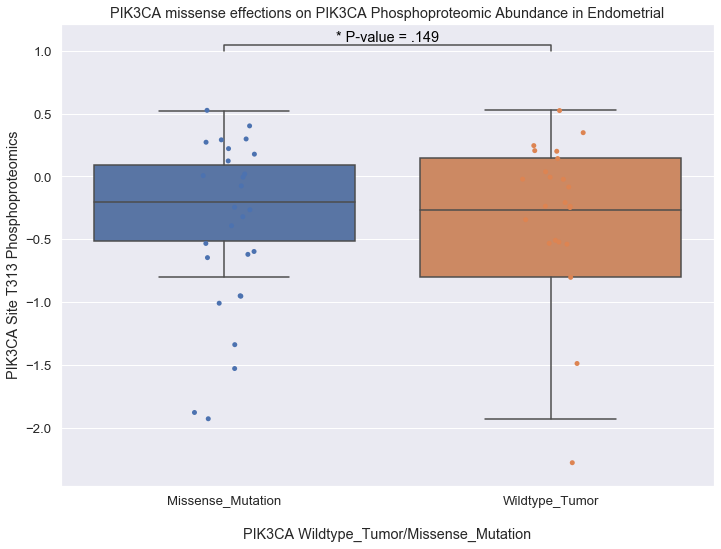

In [69]:
plt.rcParams['figure.figsize']=(11.7,8.5) #size of plot
sns.set(font_scale = 1.2)

boxplot = sns.boxplot(x='Mutation', y='S312',
                     order=['Wildtype_Tumor', 'Missense_Mutation'],
                     data=mut_and_phos,
                     showfliers=False)

boxplot.set_title("PIK3CA missense effections on " + gene + " Phosphoproteomic Abundance in Endometrial")
boxplot = sns.stripplot(x='Mutation', y='S312', data=mut_and_phos, jitter=True)
boxplot.set(xlabel="\nPIK3CA Wildtype_Tumor/Missense_Mutation", ylabel=gene+" Site T313 Phosphoproteomics")

format_pval_annotation('* P-value = .149', 0, 1, 1)

plt.show()
plt.clf()
plt.close()



# CIS in Brca

In [34]:
br = cptac.Brca()

In [47]:
phos = br.get_phosphoproteomics()
phos = br.reduce_multiindex(phos, 'Peptide')
phos = br.reduce_multiindex(phos, "Database_ID")
phos.head()

cptac warning: Due to dropping the specified levels, dataframe now has 146 duplicated column headers. (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)
cptac warning: Due to dropping the specified levels, dataframe now has 356 duplicated column headers. (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 3)


Name        A2M    AAAS           AAED1    AAGAB            AAK1          \
Site       S710    S495    S541     S12 S310S311    S311     S14     S18   
Patient_ID                                                                 
CPT000814   NaN  1.9431     NaN     NaN   0.0127 -0.4495     NaN -1.1852   
CPT001846   NaN  0.2274     NaN  0.5472   0.6895 -0.7680     NaN  0.6895   
X01BR001    NaN -2.2853 -0.8967  4.1225   0.4842 -1.2458 -0.0310  0.8805   
X01BR008    NaN  1.3714     NaN -0.0636  -0.6224 -1.2732 -1.1351 -0.8652   
X01BR009    NaN  0.2682     NaN     NaN  -0.6207 -2.3561 -0.3078  0.3785   

Name                             ...   ZZEF1    ZZZ3                          \
Site           S21 S618T620S623  ...   S2526    S113    S314    S381    S391   
Patient_ID                       ...                                           
CPT000814  -0.8333       0.0863  ... -1.7098  0.0735  0.2238 -0.6702 -8.8556   
CPT001846   0.3903          NaN  ...     NaN -0.8199     NaN -0.8790 -4.0222   
X01BR001    0.7448       1.0649  ...     NaN  0.1092     NaN     NaN -1.6299   
X01BR008    0.0031       0.2173  ...  0.7110  0.3824     NaN     NaN  1.3333   
X01BR009    0.6990      -0.1082  ... -1.4189 -0.7779     NaN     NaN  0.5267   

Name                                                     
Site          S397 S397T428N429    S606     S82     S89  
Patient_ID                                               
CPT000814      NaN      -0.8493 -0.1744 -0.0273 -6.8916  
CPT001846      NaN       1.1806 -1.2700 -0.8983 -3.6228  
X01BR001   -0.2017      -0.3953 -2.1328 -0.8815 -2.1191  
X01BR008    0.7840       0.1078  0.4824     NaN -0.9748  
X01BR009   -0.6661       0.5539 -0.3728     NaN -0.8354  

[5 rows x 38775 columns]

In [48]:
#Prioritize hotspot mutations
brca = br.get_genotype_all_vars(gene, mutation_hotspot=["H1047R", 'E542K', 'E535K'])
#pull out all the missense mutation and wildtype tumors 
missense = brca.loc[(brca['Mutation'] == "Missense_Mutation") | (brca['Mutation'] == "Wildtype_Tumor")]
#drop everything but the mutation column and join to proteomic data
missense = missense.drop(columns=['Location', 'Mutation_Status'])

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 83 samples for the PIK3CA gene (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 382)


In [49]:
mut_and_phos = missense.join(phos['PIK3CA'])
mut_and_phos.head()

,Mutation,T315
Patient_ID,,
CPT001846,Missense_Mutation,0.0935
X01BR001,Wildtype_Tumor,-1.1909
X01BR008,Wildtype_Tumor,0.1777
X01BR020,Wildtype_Tumor,-0.5601
X01BR023,Wildtype_Tumor,-0.2415


In [50]:
phos_col = list(phos['PIK3CA'].columns)

In [51]:
result = pd.DataFrame(columns=['Comparison', 'P_Value'])
dfs = []
for column in mut_and_phos:
    if column == "Mutation": pass
    else:
        site = mut_and_phos[column]
        df = mut_and_phos[['Mutation', column]].dropna()
#         df['Site'] = site
        dfs.append(u.wrap_ttest(df, 'Mutation', [column], return_all = True))
newdf = pd.concat(dfs)
#we're sorting
newdf.sort_values('P_Value')

,Comparison,P_Value
0,T315,0.32307


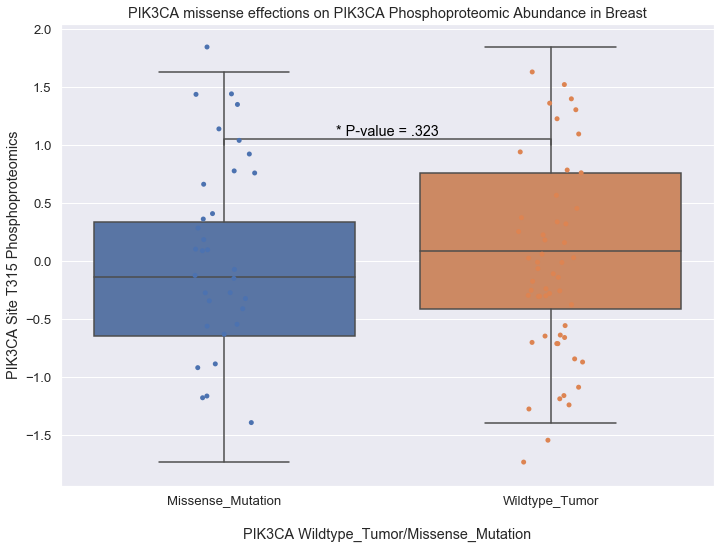

In [53]:
plt.rcParams['figure.figsize']=(11.7,8.5) #size of plot
sns.set(font_scale = 1.2)

boxplot = sns.boxplot(x='Mutation', y='T315',
                     order=['Wildtype_Tumor', 'Missense_Mutation'],
                     data=mut_and_phos,
                     showfliers=False)

boxplot.set_title("PIK3CA missense effections on " + gene + " Phosphoproteomic Abundance in Breast")
boxplot = sns.stripplot(x='Mutation', y='T315', data=mut_and_phos, jitter=True)
boxplot.set(xlabel="\nPIK3CA Wildtype_Tumor/Missense_Mutation", ylabel=gene+" Site T315 Phosphoproteomics")

format_pval_annotation('* P-value = .323', 0, 1, 1)

plt.show()
plt.clf()
plt.close()



# CIS in Colon. THERE is no PIK3CA gene for colcon

In [54]:
# cl = cptac.Colon()

In [55]:
# #Prioritize hotspot mutations
# col = cl.get_genotype_all_vars(gene, mutation_hotspot=["H1047R", 'E542K', 'E535K'])
# #pull out all the missense mutation and wildtype tumors 
# missense = col.loc[(col['Mutation'] == "Missense_Mutation") | (col['Mutation'] == "Wildtype_Tumor")]
# #drop everything but the mutation column and join to proteomic data
# missense = missense.drop(columns=['Location', 'Mutation_Status'])

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 82 samples for the PIK3CA gene (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 382)
cptac warning: CNV data was not found for the following samples, so CNV data columns were filled with NaN for these samples: 05CO045 (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 382)


In [70]:
# phos = cl.get_phosphoproteomics()
# phos = br.reduce_multiindex(phos, "Database_ID")

# phos = br.reduce_multiindex(phos, "Site")
# phos.head()
# phos['PIK3CA']

In [71]:
# mut_and_phos = missense.join(phos['PIK3CA'])
# mut_and_phos.head()

# mTOR phosphorylation

In [10]:
# phos['MTOR']

In [11]:
mut_and_phos.index.difference(phos['MTOR'].index)

Index([], dtype='object', name='Patient_ID')

In [12]:
mut_and_phos = missense.join(phos['MTOR'])

In [13]:
# mut_and_phos.head()

In [14]:
phos_col = list(phos['MTOR'].columns)

In [15]:
# mut_and_phos.head()

In [16]:
result = pd.DataFrame(columns=['Comparison', 'P_Value'])
dfs = []
for column in mut_and_phos:
#     import pdb; pdb.set_trace()
    if column == "Mutation": pass
    else:
        site = mut_and_phos[column]
        df = mut_and_phos[['Mutation', column]].dropna()
#         df['Site'] = site
        dfs.append(u.wrap_ttest(df, 'Mutation', [column], return_all = True))
newdf = pd.concat(dfs)
#we're sorting
newdf.sort_values('P_Value')

#sites that have problems: S1851, S2454, T1829, T1837

Incorrectly Formatted Dataframe! Label column must have exactly 2 unique values.
Incorrectly Formatted Dataframe! Label column must have exactly 2 unique values.


/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3367: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,Comparison,P_Value
0,S2069,0.056639
0,T1834,0.108696
0,S1821,0.128346
0,S1851,0.284785
0,T1826,0.596699
0,S2481,0.611178
0,S1261,0.614098
0,S1849,0.701403
0,Y2449,0.725583
0,T2471,0.772390


In [73]:
df = mut_and_phos[['Mutation', "S2454"]].dropna()
u.wrap_ttest(df, 'Mutation', ['S2454'], return_all = True)

KeyError: "['S2069'] not in index"

In [18]:
phos['MTOR']

Site,S1261,S1821,S1849,S1851,S2069,S2450,S2454,S2478,S2481,T1826,T1829,T1834,T1837,T1844,T2471,T2473,T2474,Y2449
Patient_ID,,,,,,,,,,,,,,,,,,
C3L-00006,0.6350,0.99800,0.998,NaN,NaN,0.251,NaN,0.19500,0.1950,NaN,NaN,0.99800,NaN,NaN,NaN,NaN,NaN,0.00353
C3L-00008,NaN,-0.02335,NaN,0.07630,NaN,NaN,NaN,0.24100,0.2410,NaN,NaN,-0.02335,-0.29100,-0.29100,NaN,NaN,NaN,NaN
C3L-00032,0.0346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C3L-00090,0.0947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.4460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C3L-00098,0.3810,0.47000,NaN,NaN,NaN,NaN,NaN,-1.12000,-0.6525,NaN,NaN,0.47000,NaN,NaN,-0.1850,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NX5.N,0.0637,-0.00614,NaN,-0.00799,NaN,NaN,NaN,0.16655,0.0501,NaN,NaN,0.17958,NaN,NaN,0.6965,1.110,1.110,NaN
NX6.N,0.3490,0.26800,NaN,0.05550,NaN,NaN,NaN,0.61200,0.4740,NaN,NaN,0.20600,NaN,NaN,0.8275,0.905,0.905,NaN
NX7.N,-0.5430,-0.76100,NaN,-0.54600,NaN,NaN,NaN,-0.02850,-0.2740,NaN,NaN,-1.03050,NaN,NaN,0.4390,0.661,0.661,NaN


In [19]:
mut_and_phos

,Mutation,S1261,S1821,S1849,S1851,S2069,S2450,S2454,S2478,S2481,T1826,T1829,T1834,T1837,T1844,T2471,T2473,T2474,Y2449
Patient_ID,,,,,,,,,,,,,,,,,,,
C3L-00006,Missense_Mutation,0.6350,0.998000,0.998,NaN,NaN,0.251,NaN,0.19500,0.195000,NaN,NaN,0.998000,NaN,NaN,NaN,NaN,NaN,0.00353
C3L-00008,Wildtype_Tumor,NaN,-0.023350,NaN,0.07630,NaN,NaN,NaN,0.24100,0.241000,NaN,NaN,-0.023350,-0.291,-0.291,NaN,NaN,NaN,NaN
C3L-00032,Missense_Mutation,0.0346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C3L-00090,Wildtype_Tumor,0.0947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.446000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C3L-00136,Wildtype_Tumor,NaN,0.024265,NaN,0.00423,NaN,NaN,NaN,0.61200,0.612000,NaN,NaN,0.024265,0.000,0.000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C3N-01510,Missense_Mutation,-1.0600,0.098600,NaN,NaN,NaN,NaN,NaN,-0.00733,0.126835,NaN,NaN,0.098600,NaN,NaN,0.261,NaN,NaN,NaN
C3N-01520,Missense_Mutation,-0.2060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.150000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C3N-01537,Wildtype_Tumor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.83100,-0.831000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Plot

In [20]:
def format_pval_annotation(pval_symbol, x1, x2, line_start = .05, line_height=.05):
    # for manual adjustment to pval annotations
    
    y, h = line_start, line_height
    plt.plot([x1, x1, x2, x2], #draw horizontal line
             [y, y+h, y+h, y], #vertical line
             lw=1.5, color= '.3')
    plt.text((x1+x2)*.5, # half between x coord
             y+h, pval_symbol, horizontalalignment='center', verticalalignment='bottom', color = "black")


In [21]:
site = "S2069"

In [72]:
df.head()

,Mutation,T313
Patient_ID,,
C3L-00006,Missense_Mutation,0.0731
C3L-00032,Missense_Mutation,0.0830
C3L-00090,Wildtype_Tumor,-0.8460
C3L-00161,Missense_Mutation,-0.0589
C3L-00361,Wildtype_Tumor,-1.0700


In [22]:
plt.rcParams['figure.figsize']=(11.7,8.5) #size of plot
sns.set(font_scale = 1.2)

boxplot = sns.boxplot(x='Mutation', y=site, 
                         order = ['Wildtype_Tumor', 'Missense_Mutation'], data = df, showfliers = False)    
boxplot.set_title('PIK3CA Missense Effect on '+site+' Phosphoproteomic Abundance in Endometrial Tumors')
boxplot = sns.stripplot(x='Mutation', y=site, data = df, jitter = True, 
                           color = ".3", order = ['Wildtype_Tumor', 'Missense_Mutation'], dodge = True)
boxplot.set(xlabel = "\nPIK3CA Wildtype_Tumor/Missense_Mutation", ylabel = site+' Phosphoproteomics')

format_pval_annotation('* P-Value = 0.002', 0, 1, 1)

plt.show()
plt.clf()
plt.close()

ValueError: Could not interpret input 'S2069'

# AKT

In [ ]:
gene1_filter = phos.columns.get_level_values("Name").str.startswith("AKT") # Select all columns where the gene starts with "AA". This will grab every column where the key "Name" starts with AA
gene1_data = phos.loc[:, gene1_filter]
gene1_data.head()

In [ ]:
akt1 = gene1_data['AKT1']

In [ ]:
mut_and_phos = missense.join(akt1)
mut_and_phos

In [ ]:
phos_col = list(gene1_data['AKT1'].columns)

In [ ]:
result = pd.DataFrame(columns=['Comparison', 'P_Value'])
dfs = []
for column in mut_and_phos:
#     import pdb; pdb.set_trace()
    if column == "Mutation": pass
    else:
        site = mut_and_phos[column]
        df = mut_and_phos[['Mutation', column]].dropna()
#         df['Site'] = site
        dfs.append(u.wrap_ttest(df, 'Mutation', [column], return_all = True))
newdf = pd.concat(dfs)
#we're sorting
newdf.sort_values('P_Value')

In [ ]:
akt1s1 = gene1_data['AKT1S1']
mut_and_phos = missense.join(akt1s1)
phos_col = list(gene1_data['AKT1S1'].columns)
result = pd.DataFrame(columns=['Comparison', 'P_Value'])

dfs = []
for column in mut_and_phos:
#     import pdb; pdb.set_trace()
    if column == "Mutation": pass
    else:
        site = mut_and_phos[column]
        df = mut_and_phos[['Mutation', column]].dropna()
#         df['Site'] = site
        dfs.append(u.wrap_ttest(df, 'Mutation', [column], return_all = True))
newdf = pd.concat(dfs)
#we're sorting
newdf.sort_values('P_Value')

In [ ]:
AKT2 = gene1_data['AKT2']
mut_and_phos = missense.join(AKT2)
phos_col = list(gene1_data['AKT2'].columns)
result = pd.DataFrame(columns=['Comparison', 'P_Value'])

dfs = []
for column in mut_and_phos:
#     import pdb; pdb.set_trace()
    if column == "Mutation": pass
    else:
        site = mut_and_phos[column]
        df = mut_and_phos[['Mutation', column]].dropna()
#         df['Site'] = site
        dfs.append(u.wrap_ttest(df, 'Mutation', [column], return_all = True))
newdf = pd.concat(dfs)
#we're sorting
newdf.sort_values('P_Value')

In [ ]:
AKT3 = gene1_data['AKT3']
mut_and_phos = missense.join(AKT3)
phos_col = list(gene1_data['AKT3'].columns)
result = pd.DataFrame(columns=['Comparison', 'P_Value'])

dfs = []
for column in mut_and_phos:
#     import pdb; pdb.set_trace()
    if column == "Mutation": pass
    else:
        site = mut_and_phos[column]
        df = mut_and_phos[['Mutation', column]].dropna()
#         df['Site'] = site
        dfs.append(u.wrap_ttest(df, 'Mutation', [column], return_all = True))
newdf = pd.concat(dfs)
#we're sorting
newdf.sort_values('P_Value')

In [ ]:
gene1_data['AKT3']

# The 62 from the paper. 

kinases RPS6KA5
and EIF2AK4

In [ ]:
phos['RPS6KA5']

In [ ]:
mut_and_phos = missense.join(phos['RPS6KA5'])
phos_col = list(phos['RPS6KA5'].columns)

result = pd.DataFrame(columns=['Comparison', 'P_Value'])

dfs = []
for column in mut_and_phos:
#     import pdb; pdb.set_trace()
    if column == "Mutation": pass
    else:
        site = mut_and_phos[column]
        df = mut_and_phos[['Mutation', column]].dropna()
#         df['Site'] = site
        dfs.append(u.wrap_ttest(df, 'Mutation', [column], return_all = True))
newdf = pd.concat(dfs)
#we're sorting
newdf.sort_values('P_Value')

## S517

In [ ]:
site = 'S517'

In [ ]:
df = mut_and_phos[['Mutation', site]].dropna()

In [ ]:
df

In [ ]:
plt.rcParams['figure.figsize']=(11.7,8.5) #size of plot
sns.set(font_scale = 1.2)

boxplot = sns.boxplot(x='Mutation', y=site, 
                         order = ['Wildtype_Tumor', 'Missense_Mutation'], data = df, showfliers = False)    
boxplot.set_title('PIK3CA Missense Effect on '+site+' Phosphoproteomic Abundance in Endometrial Tumors')
boxplot = sns.stripplot(x='Mutation', y=site, data = df, jitter = True, 
                           color = ".3", order = ['Wildtype_Tumor', 'Missense_Mutation'], dodge = True)
boxplot.set(xlabel = "\nPIK3CA Wildtype_Tumor/Missense_Mutation", ylabel = site+' Phosphoproteomics')

format_pval_annotation('* P-Value = 0.002', 0, 1, 1)

plt.show()
plt.clf()
plt.close()

## S628

In [ ]:
site = 'S628'

In [ ]:
df = mut_and_phos[['Mutation', site]].dropna()

In [ ]:
df

In [ ]:
plt.rcParams['figure.figsize']=(11.7,8.5) #size of plot
sns.set(font_scale = 1.2)

boxplot = sns.boxplot(x='Mutation', y=site, 
                         order = ['Wildtype_Tumor', 'Missense_Mutation'], data = df, showfliers = False)    
boxplot.set_title('PIK3CA Missense Effect on '+site+' Phosphoproteomic Abundance in Endometrial Tumors')
boxplot = sns.stripplot(x='Mutation', y=site, data = df, jitter = True, 
                           color = ".3", order = ['Wildtype_Tumor', 'Missense_Mutation'], dodge = True)
boxplot.set(xlabel = "\nPIK3CA Wildtype_Tumor/Missense_Mutation", ylabel = site+' Phosphoproteomics')

format_pval_annotation('* P-Value = 0.08', 0, 1, 1)

plt.show()
plt.clf()
plt.close()

# Make a function for the rest of them

In [ ]:
def transEffect(protein):
    mut_and_phos = missense.join(phos[protein])
    phos_col = list(phos[protein].columns)

    result = pd.DataFrame(columns=['Comparison', 'P_Value'])

    dfs = []
    for column in mut_and_phos:
    #     import pdb; pdb.set_trace()
        if column == "Mutation": pass
        else:
            site = mut_and_phos[column]
            df = mut_and_phos[['Mutation', column]].dropna()
    #         df['Site'] = site
            dfs.append(u.wrap_ttest(df, 'Mutation', [column], return_all = True))
    newdf = pd.concat(dfs)
    #we're sorting
    newdf = newdf.sort_values('P_Value')
    return newdf


In [ ]:
transEffect('TRIM28')

In [ ]:
protein_list_from_paper = [
'TRIM28',
'ARHGEF35',
'RPS6KA5',
'EIF2AK4',
'SRRT',
'BCL9',
'TP53BP1',
# 'FAM21A',
'MAPT',
'MAPT',
'TSC22D3',
'HEATR3',
'MED26',
'ACIN1',
'HUWE1',
'GTF3C1',
'ZC3H14',
'KRT8',
'MAPT',
'SPAG7',
'ARID4B',
'METTL3',
'MAPT',
'MAPT',
'MAPT',
'UBXN2B',
'RAVER1',
'RTF1',
'RXRA',
'PHF20L1',
'WWC3',
# 'WHSC2',
'GTF2F1',
'RPS6KA5',
'UBXN7',
'BCL2L11',
'NOSIP',
'MPG',
'PPP6R2',
'KHDRBS1',
'FIP1L1',
'STAT3',
'RAPH1',
'NFIA',
'HUWE1',
'DDX17',
'TSC22D3',
'NFIA',
# 'KIAA1468',
# 'ANXA11',
'RAVER1',
'FAM83H',
'WIZ',
'DTNBP1',
# 'C1ORF174',
'RBM5',
'INTS1',
'RBM10',
'KCTD1',
'TAF3',
'PRR12']

In [ ]:
# transEffect('FAM184B')

In [ ]:
table = []
for protein in protein_list_from_paper:
    df = transEffect(protein)
    df = df.assign(Protein=protein)
    table.append(df)
    
pd.concat(table)
